# Topic Classification News

## Prepare Train Dataset

In [4]:
# install kora (untuk akses google drive)
!pip install kora -q
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 14.0 MB/s eta 0:00:00


In [5]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Download model dan dataset dari folder di Google Drive kami
from kora import drive
from urllib.request import urlretrieve
import sys

def download_folder(folder_id):
    # authenticate
    from google.colab import auth
    auth.authenticate_user()
    # get folder_name
    from googleapiclient.discovery import build
    service = build('drive', 'v3')
    folder_name = service.files().get(fileId=folder_id).execute()['name']
    # install library
    url = 'https://github.com/segnolin/google-drive-folder-downloader/raw/master/download.py'
    path = 'download.py'
    urlretrieve(url, path)
    # recursive download
    import download
    download.download_folder(service, folder_id, './', folder_name)
    return folder_name

folder_name = download_folder('1qtTMSILj76-15k7OZij5mabZin3kZ4p6')  # id folder penyimpanan dataset dan model
sys.path.insert(0, f"/content/{folder_name}")

1I8BNWqOG1ba8ddEEf3ArGZ3i8o9m4wvB labelled_newscatcher_dataset.csv text/csv (1/1)
Download 100%.


In [7]:
# Load and tampilkan sebagian data
dataset_article = pd.read_csv(f'./{folder_name}/labelled_newscatcher_dataset.csv', sep=";")

dataset_article

,topic,link,domain,published_date,title,lang
0,SCIENCE,https://www.eurekalert.org/pub_releases/2020-0...,eurekalert.org,2020-08-06 13:59:45,A closer look at water-splitting's solar fuel ...,en
1,SCIENCE,https://www.pulse.ng/news/world/an-irresistibl...,pulse.ng,2020-08-12 15:14:19,"An irresistible scent makes locusts swarm, stu...",en
2,SCIENCE,https://www.express.co.uk/news/science/1322607...,express.co.uk,2020-08-13 21:01:00,Artificial intelligence warning: AI will know ...,en
3,SCIENCE,https://www.ndtv.com/world-news/glaciers-could...,ndtv.com,2020-08-03 22:18:26,Glaciers Could Have Sculpted Mars Valleys: Study,en
4,SCIENCE,https://www.thesun.ie/tech/5742187/perseid-met...,thesun.ie,2020-08-12 19:54:36,Perseid meteor shower 2020: What time and how ...,en
...,...,...,...,...,...,...
108769,NATION,https://www.vanguardngr.com/2020/08/pdp-govern...,vanguardngr.com,2020-08-08 02:40:00,PDP governors’ forum urges security agencies t...,en
108770,BUSINESS,https://www.patentlyapple.com/patently-apple/2...,patentlyapple.com,2020-08-08 01:27:12,"In Q2-20, Apple Dominated the Premium Smartpho...",en
108771,HEALTH,https://www.belfastlive.co.uk/news/health/coro...,belfastlive.co.uk,2020-08-12 17:01:00,Coronavirus Northern Ireland: Full breakdown s...,en
108772,ENTERTAINMENT,https://www.thenews.com.pk/latest/696364-paul-...,thenews.com.pk,2020-08-05 04:59:00,Paul McCartney details post-Beatles distress a...,en


In [8]:
dataset_article['topic'].value_counts()

TECHNOLOGY       15000
HEALTH           15000
WORLD            15000
ENTERTAINMENT    15000
SPORTS           15000
BUSINESS         15000
NATION           15000
SCIENCE           3774
Name: topic, dtype: int64

In [9]:
dataset_article.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108774 entries, 0 to 108773
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   topic           108774 non-null  object
 1   link            108774 non-null  object
 2   domain          108774 non-null  object
 3   published_date  108774 non-null  object
 4   title           108774 non-null  object
 5   lang            108774 non-null  object
dtypes: object(6)
memory usage: 5.0+ MB


In [10]:
date_range = dataset_article['published_date'].min(), dataset_article['published_date'].max()
date_range

('2012-09-16 04:44:50', '2020-08-18 05:49:00')

In [11]:
# sample hanya beberapa data, karena keterbatasan resource yang digunakan
from sklearn.model_selection import train_test_split

# Melakukan stratified sampling pada kolom 'kategori'
dataset, _ = train_test_split(dataset_article, train_size=10000, stratify=dataset_article['topic'], random_state=42)
dataset

,topic,link,domain,published_date,title,lang
28130,BUSINESS,https://www.globenewswire.com/news-release/202...,globenewswire.com,2020-08-04 12:13:00,Insights on the Remote Sensing Services Global...,en
47192,WORLD,https://www.thestar.com.my/news/world/2020/08/...,thestar.com.my,2020-08-05 05:32:00,"Modi, Muslims to attend temple ceremony on con...",en
48704,ENTERTAINMENT,http://theindependent.sg/miley-cyrus-reveals-t...,theindependent.sg,2020-08-16 10:00:00,Miley Cyrus reveals that she lost her virginit...,en
93754,HEALTH,https://ca.sports.yahoo.com/news/major-coronav...,ca.sports.yahoo.com,2020-08-07 14:00:00,Coronavirus: The 16 major developments that ha...,en
29888,WORLD,https://news.yahoo.com/sacramento-selected-cov...,news.yahoo.com,2020-08-13 04:21:13,Sacramento selected as COVID-19 vaccine trial ...,en
...,...,...,...,...,...,...
78065,WORLD,https://globalnews.ca/news/7262248/coronavirus...,globalnews.ca,2020-08-10 11:20:32,'$100 billion will be needed': Huge gap in vac...,en
3685,HEALTH,https://www.midlands103.com/news/midlands-news...,midlands103.com,2020-08-04 14:38:41,Laois Man Battling Skin Cancer Urges More Peop...,en
94216,BUSINESS,https://www.globenewswire.com/news-release/202...,globenewswire.com,2020-08-12 05:30:00,Nicox Partners ZERVIATE in the Gulf and Arab M...,en
15306,WORLD,https://globalnews.ca/news/7255253/coronavirus...,globalnews.ca,2020-08-06 18:31:33,Coronavirus: CDC lifts travel warnings for 20 ...,en


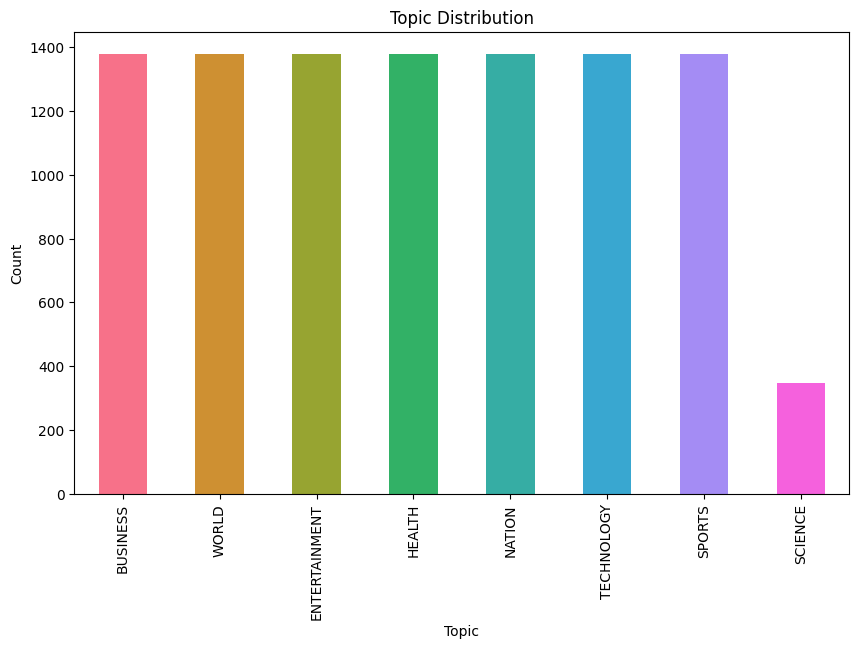

In [12]:
# plot topic distribution
topic_counts = dataset['topic'].value_counts()
colors = sns.color_palette('husl', len(topic_counts))
# Plotting
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color=colors)
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

In [13]:
# drop unused field
columns_to_drop = ['link', 'domain', 'published_date', 'lang']
dataset = dataset.drop(columns=columns_to_drop)
dataset

,topic,title
28130,BUSINESS,Insights on the Remote Sensing Services Global...
47192,WORLD,"Modi, Muslims to attend temple ceremony on con..."
48704,ENTERTAINMENT,Miley Cyrus reveals that she lost her virginit...
93754,HEALTH,Coronavirus: The 16 major developments that ha...
29888,WORLD,Sacramento selected as COVID-19 vaccine trial ...
...,...,...
78065,WORLD,'$100 billion will be needed': Huge gap in vac...
3685,HEALTH,Laois Man Battling Skin Cancer Urges More Peop...
94216,BUSINESS,Nicox Partners ZERVIATE in the Gulf and Arab M...
15306,WORLD,Coronavirus: CDC lifts travel warnings for 20 ...


In [14]:
label = dataset['topic'].unique()
label

array(['BUSINESS', 'WORLD', 'ENTERTAINMENT', 'HEALTH', 'NATION',
       'TECHNOLOGY', 'SPORTS', 'SCIENCE'], dtype=object)

In [15]:
# mapping label
label_mapping = {
    'SCIENCE': 0,
    'TECHNOLOGY': 1,
    'HEALTH': 2,
    'WORLD': 3,
    'ENTERTAINMENT': 4,
    'SPORTS': 5,
    'BUSINESS': 6,
    'NATION': 7
}
label_mapping_reverse=['SCIENCE','TECHNOLOGY','HEALTH','WORLD','ENTERTAINMENT','SPORTS','BUSINESS','NATION']

#### Create Dataset Dict

In [16]:
X_dict = dataset['title'].tolist()
y_dict = dataset['topic']
y_dict = y_dict.replace(label_mapping).tolist()

# Split the dataset into train (80%), test (10%), and validation (10%)
X_train_dict, X_test_val_dict, y_train_dict, y_test_val_dict = train_test_split(X_dict , y_dict, test_size =0.2, random_state =42)
X_test_dict, X_val_dict, y_test_dict, y_val_dict = train_test_split(X_test_val_dict , y_test_val_dict, test_size =0.5, random_state =42)

In [17]:
train_data = {'text': X_train_dict, 'label': y_train_dict}
validation_data = {'text': X_val_dict, 'label': y_val_dict}
test_data = {'text': X_test_dict, 'label': y_test_dict}

In [18]:
# Create DatasetDict
from datasets import DatasetDict, Dataset

dataset_dict = DatasetDict({
    'train': Dataset.from_dict(train_data),
    'validation': Dataset.from_dict(validation_data),
    'test': Dataset.from_dict(test_data)
})
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1000
    })
})

## Training

### Split dataset Train

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Split the dataset into train (80%), test (10%), and validation (10%)
train, test_val= train_test_split(dataset, test_size=0.2, random_state=42)
test, val = train_test_split(test_val, test_size=0.5, random_state=42)

# Display the shapes of the split datasets
print(f"Train set shape: {train.shape}")
print(f"Test set shape: {test.shape}")
print(f"Validation set shape: {val.shape}")

Train set shape: (8000, 2)
Test set shape: (1000, 2)
Validation set shape: (1000, 2)


### Model RNN-based

In [37]:
# install depedencies
!pip install tensorflow transformers -q
!pip install datasets -q
!pip install transformers[torch]
!pip install evaluate
!pip install gensim -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00


In [38]:
# import library dan modul yang akan digunakan
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from datasets import load_dataset


#### Pre-process dataset

In [50]:
# split dataset antara text dan label
X_rnn = dataset['title'].tolist()
y_rnn = dataset['topic']

In [51]:
# melakukan encoding terhadap label
# - 'SCIENCE' = 0
# - 'TECHNOLOGY' = 1
# - 'HEALTH' = 2
# - 'WORLD' = 3
# - 'ENTERTAINMENT' = 4
# - 'SPORTS'= 5
# - 'BUSINESS' = 6
# - 'NATION' = 7


y_rnn = y_rnn.replace(label_mapping).tolist()


In [52]:
# inisialisasi tokenizer dengan jumlah maksimum kata yang unik sebanyak 10000
max_words = 10000
tokenizer_rnn = Tokenizer(num_words = max_words)

# fit tokenizer dengan teks data untuk menciptakan kamus
tokenizer_rnn.fit_on_texts(X_rnn)

# mengkonversi teks menjadi sequence integer token berdasarkan kamus
sequences = tokenizer_rnn.texts_to_sequences(X_rnn)

# memberikan pading terhadap sequence ke panjang yang ditentukan
X_rnn_out = pad_sequences(sequences, maxlen=100)

In [53]:
# konversi data menjadi numpy array untuk dapat diproses library / modul yang akan digunakan, serta melakukan one-hot encoding terhadap label karena output berupa multi-class
X_rnn_out = np.array(X_rnn_out)
y_rnn_out = np.eye(8)[np.array(y_rnn)]

# Split the dataset into train (80%), test (10%), and validation (10%)
X_train_rnn, X_test_val_rnn, y_train_rnn, y_test_val_rnn = train_test_split(X_rnn_out , y_rnn_out, test_size =0.2, random_state =42)
X_test_rnn, X_val_rnn, y_test_rnn, y_val_rnn = train_test_split(X_test_val_rnn , y_test_val_rnn, test_size =0.2, random_state =42)


#### Training

In [54]:
# import library word2vec
from gensim.models import Word2Vec

# melatih model word2vec dengan menggunakan text sebelumnya dengan vektor 300 dimensi dengan window 5 kata sebelum dan 5 kata sesudah target, dengan jumlah minimum kata setidaknya 1 kali
word2vec_model = Word2Vec(sentences = X_rnn, vector_size=300, window=5, min_count=1, sg=0)

# menyimpan model word2vec yang sudah dilatih
word2vec_model.save("word2vec.model")

In [55]:
embedding_matrix_word2vec = np.zeros((max_words, 300))
for word, i in tokenizer_rnn.word_index.items():
  if i < max_words:
    if word in word2vec_model.wv:
      embedding_matrix_word2vec[i] = word2vec_model.wv[word]

In [57]:
# membuat sekuens model untuk memberikan layer secara sekuensial
model_rnn_word2vec = Sequential()

# menambahkan embedding layer dengan menggunakan embedding matrix yang sudah dihasilkan sebelumnya untuk mengkonversi integer token menjadi dense vector
model_rnn_word2vec.add(Embedding(input_dim=max_words, output_dim=300, input_length=X_train_rnn.shape[1], weights=[embedding_matrix_word2vec], trainable=True))

# menambahkan bidirectional LTSM dengan 64 unit dan return sequence untuk input selanjutnya
model_rnn_word2vec.add(Bidirectional(LSTM(64, return_sequences=True)))

# menambahkan bidirectional LTSM dengan 32 unit (final hidden layer)
model_rnn_word2vec.add(Bidirectional(LSTM(32)))

# menambahkan dropout layer
model_rnn_word2vec.add(Dropout(0.2))

# menambahkan dense layer dengan output 3 unit dengan fungsi aktivasi softmax dikarenakan output merupakan multi-class label
model_rnn_word2vec.add(Dense(8, activation='softmax'))

In [62]:
# compile model menggunakan binary cross-entropy loss, Adam optimizer dan akurasi metriks
model_rnn_word2vec.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn_word2vec.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 300)          3000000   
                                                                 
 bidirectional_4 (Bidirecti  (None, 100, 128)          186880    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 3228616 (12.32 MB)
Trainable params: 322

In [65]:
from tensorflow.keras.callbacks import EarlyStopping
# melakukan train model menggunakan training data(X_train, y_train)
# dengan epoch atau bayaknya training adalah 10
# dengan batch size atau ukuran sampel yang akan digunakan setiap update bobot model adalah 32
# dan validation_data atau data yang digunakan untuk evaluasi model pada validation set selama training adalah (X_test, y_test)
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_rnn = model_rnn_word2vec.fit(X_train_rnn, y_train_rnn, epochs=15, batch_size=100, validation_data=(X_val_rnn, y_val_rnn))

Epoch 1/15
80/80 [==============================] - 44s 552ms/step - loss: 0.0159 - accuracy: 0.9890 - val_loss: 0.3582 - val_accuracy: 0.6350
Epoch 2/15
80/80 [==============================] - 41s 513ms/step - loss: 0.0140 - accuracy: 0.9906 - val_loss: 0.3836 - val_accuracy: 0.6475
Epoch 3/15
80/80 [==============================] - 34s 432ms/step - loss: 0.0123 - accuracy: 0.9912 - val_loss: 0.3811 - val_accuracy: 0.6550
Epoch 4/15
80/80 [==============================] - 35s 437ms/step - loss: 0.0107 - accuracy: 0.9930 - val_loss: 0.3869 - val_accuracy: 0.6600
Epoch 5/15
80/80 [==============================] - 34s 430ms/step - loss: 0.0090 - accuracy: 0.9945 - val_loss: 0.3802 - val_accuracy: 0.6850
Epoch 6/15
80/80 [==============================] - 39s 483ms/step - loss: 0.0083 - accuracy: 0.9944 - val_loss: 0.4054 - val_accuracy: 0.6750
Epoch 7/15
80/80 [==============================] - 40s 494ms/step - loss: 0.0078 - accuracy: 0.9942 - val_loss: 0.4077 - val_accuracy: 0.6500

In [66]:
# save model
from google.colab import drive
drive.mount('/gdrive')
model_rnn_word2vec.save('model/model_rnn_word2vec', save_format="h5")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
from keras.models import load_model
model_rnn_word2vec_load = load_model('model/model_rnn_word2vec')

In [68]:
# evaluasi model berupa loss dan akurasi pada data train
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
print("TRAIN")
loss, accuracy = model_rnn_word2vec_load.evaluate(X_train_rnn, y_train_rnn)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

y_pred = model_rnn_word2vec_load.predict(X_train_rnn)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_train_rnn, axis=1)
# Print f1, precision, and recall scores
print(f'Test precision:{precision_score(y_test, y_pred , average="macro")}')
print(f'Test recall:{recall_score(y_test, y_pred , average="macro")}')
print(f'Test f1_score:{f1_score(y_test, y_pred , average="macro")}')

250/250 [==============================] - 18s 59ms/step - loss: 0.0022 - accuracy: 0.9971
Test loss: 0.0022
Test accuracy: 0.9971
250/250 [==============================] - 15s 54ms/step
Test precision:0.9970617650313693
Test recall:0.9973971444173493
Test f1_score:0.9972240395984879


In [69]:
# evaluasi model berupa loss dan akurasi pada data val
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
print("VALIDATION")
loss, accuracy = model_rnn_word2vec_load.evaluate(X_val_rnn, y_val_rnn)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

y_pred = model_rnn_word2vec_load.predict(X_val_rnn)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val_rnn, axis=1)
# Print f1, precision, and recall scores
print(f'Test precision:{precision_score(y_test, y_pred , average="macro")}')
print(f'Test recall:{recall_score(y_test, y_pred , average="macro")}')
print(f'Test f1_score:{f1_score(y_test, y_pred , average="macro")}')

VALIDATION
13/13 [==============================] - 4s 104ms/step - loss: 0.4490 - accuracy: 0.6750
Test loss: 0.4490
Test accuracy: 0.6750
13/13 [==============================] - 4s 66ms/step
Test precision:0.6882117121894846
Test recall:0.6652089183811146
Test f1_score:0.6723831539750662


In [70]:
# evaluasi model berupa loss dan akurasi pada data test
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

loss, accuracy = model_rnn_word2vec_load.evaluate(X_test_rnn, y_test_rnn)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

y_pred = model_rnn_word2vec_load.predict(X_test_rnn)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test_rnn, axis=1)
# Print f1, precision, and recall scores
print(f'Test precision:{precision_score(y_test, y_pred , average="macro")}')
print(f'Test recall:{recall_score(y_test, y_pred , average="macro")}')
print(f'Test f1_score:{f1_score(y_test, y_pred , average="macro")}')

50/50 [==============================] - 3s 65ms/step - loss: 0.4670 - accuracy: 0.6375
Test loss: 0.4670
Test accuracy: 0.6375
50/50 [==============================] - 5s 99ms/step
Test precision:0.6544379358312558
Test recall:0.6343426072786046
Test f1_score:0.6423599017174457


### Model Attention

In [66]:
!pip install transformers
!pip install datasets
!pip install evaluate
!pip install transformers[torch]
!pip install accelerate -U

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
# import library
import tensorflow as tf
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import load_dataset, DatasetDict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Split Dataset

In [68]:
dataset_dict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1000
    })
})

In [69]:
tokenizer_bert = AutoTokenizer.from_pretrained("bert-base-uncased",do_lower_case=True)

def tokenize_function(examples):
  return tokenizer_bert(examples['text'], padding="max_length", truncation=True)

tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [70]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=8)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [71]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)
  return metric.compute(predictions=predictions, references=labels)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer")

trainer = Trainer(
    model =model,
    args =training_args,
    train_dataset = tokenized_datasets['train'],
    eval_dataset = tokenized_datasets['validation'],
    compute_metrics=compute_metrics
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Step,Training Loss
500,1.006800
1000,0.790500
1500,0.525400
2000,0.477300
2500,0.287100
3000,0.264000


TrainOutput(global_step=3000, training_loss=0.5585297597249349, metrics={'train_runtime': 2298.7554, 'train_samples_per_second': 10.44, 'train_steps_per_second': 1.305, 'total_flos': 6315005509632000.0, 'train_loss': 0.5585297597249349, 'epoch': 3.0})

In [74]:
result = trainer.evaluate()
result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'eval_loss': 0.9700022339820862,
 'eval_accuracy': 0.784,
 'eval_runtime': 30.8719,
 'eval_samples_per_second': 32.392,
 'eval_steps_per_second': 4.049,
 'epoch': 3.0}

In [100]:
# melakukan prediksi menggunakan model yang telah dibangun untuk dataset test
result = trainer.predict(tokenized_datasets['train'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
result.metrics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'test_loss': 0.1542043536901474,
 'test_accuracy': 0.96,
 'test_runtime': 267.2993,
 'test_samples_per_second': 29.929,
 'test_steps_per_second': 3.741}

In [102]:
y_pred = np.argmax(result.predictions, axis=1)
y_test = result.label_ids

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
print(f'Test accuracy: {accuracy_score(y_test,  y_pred)}')
print(f'Test precision:{precision_score(y_test, y_pred , average="macro")}')
print(f'Test recall:{recall_score(y_test, y_pred , average="macro")}')
print(f'Test f1_score:{f1_score(y_test, y_pred , average="macro")}')

Test accuracy: 0.96
Test precision:0.9610257952507673
Test recall:0.9583618992347157
Test f1_score:0.9595907143389931


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
# melakukan prediksi menggunakan model yang telah dibangun untuk dataset test
result = trainer.predict(tokenized_datasets['validation'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
result.metrics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'test_loss': 0.9700022339820862,
 'test_accuracy': 0.784,
 'test_runtime': 32.244,
 'test_samples_per_second': 31.014,
 'test_steps_per_second': 3.877}

In [94]:
y_pred = np.argmax(result.predictions, axis=1)
y_test = result.label_ids

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
print(f'Test accuracy: {accuracy_score(y_test,  y_pred)}')
print(f'Test precision:{precision_score(y_test, y_pred , average="macro")}')
print(f'Test recall:{recall_score(y_test, y_pred , average="macro")}')
print(f'Test f1_score:{f1_score(y_test, y_pred , average="macro")}')

Test accuracy: 0.784
Test precision:0.7864627807787321
Test recall:0.7923262010607213
Test f1_score:0.7883843274890165


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
# melakukan prediksi menggunakan model yang telah dibangun untuk dataset test
result = trainer.predict(tokenized_datasets['test'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
y_pred = np.argmax(result.predictions, axis=1)
y_test = result.label_ids

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
result.metrics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'test_loss': 0.8000075221061707,
 'test_accuracy': 0.812,
 'test_runtime': 31.7629,
 'test_samples_per_second': 31.483,
 'test_steps_per_second': 3.935}

In [99]:
print(f'Test accuracy: {accuracy_score(y_test,  y_pred)}')
print(f'Test precision:{precision_score(y_test, y_pred , average="macro")}')
print(f'Test recall:{recall_score(y_test, y_pred , average="macro")}')
print(f'Test f1_score:{f1_score(y_test, y_pred , average="macro")}')

Test accuracy: 0.812
Test precision:0.8048582792546448
Test recall:0.8104518164007167
Test f1_score:0.8070379389992045


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Model GPT 2

In [26]:
!pip install -q git+https://github.com/gmihaila/ml_things.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 801.2 kB/s eta 0:00:00


In [27]:
!pip install tensorflow transformers -q
!pip install datasets -q
!pip install transformers[torch] -q
!pip install evaluate -q
!pip install seqeval -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [46]:
import io
import os
import torch
from tqdm.notebook import tqdm
from torch.utils.data import Dataset, DataLoader
from ml_things import plot_dict, plot_confusion_matrix, fix_text
from sklearn.metrics import classification_report, accuracy_score
from transformers import (set_seed,
                          TrainingArguments,
                          Trainer,
                          GPT2Config,
                          GPT2Tokenizer,
                          AdamW,
                          get_linear_schedule_with_warmup,
                          GPT2ForSequenceClassification)

set_seed(123)

epochs = 10
batch_size = 50
max_length = 60
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_name_or_path = 'gpt2'
labels_ids = {
    0:'SCIENCE',
    1:'TECHNOLOGY',
    2:'HEALTH',
    3:'WORLD',
    4:'ENTERTAINMENT',
    5:'SPORTS',
    6:'BUSINESS',
    7:'NATION'
}
n_labels = len(labels_ids)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
class TopicClassificationDataset(Dataset):
  def __init__(self, path, use_tokenizer):
    self.texts = path['text']
    self.labels = path['label']
    self.n_examples = len(self.labels)

  def __len__(self):
    return self.n_examples

  def __getitem__(self, item):
    return {'text': self.texts[item],
            'label': self.labels[item]}



class Gpt2ClassificationCollator(object):
    def __init__(self, use_tokenizer, labels_encoder, max_sequence_len=None):
        self.use_tokenizer = use_tokenizer
        self.max_sequence_len = use_tokenizer.model_max_length if max_sequence_len is None else max_sequence_len
        self.labels_encoder = labels_encoder

    def __call__(self, sequences):
        texts = [sequence['text'] for sequence in sequences]
        labels = [sequence['label'] for sequence in sequences]
        inputs = self.use_tokenizer(text=texts, return_tensors="pt", padding=True, truncation=True, max_length=self.max_sequence_len)
        inputs.update({'labels': torch.tensor(labels)})

        return inputs


def train(dataloader, optimizer_, scheduler_, device_):
  global model
  predictions_labels = []
  true_labels = []
  total_loss = 0
  model.train()
  for batch in tqdm(dataloader, total=len(dataloader)):
    true_labels += batch['labels'].numpy().flatten().tolist()
    batch = {k:v.type(torch.long).to(device_) for k,v in batch.items()}
    model.zero_grad()
    outputs = model(**batch)
    loss, logits = outputs[:2]
    total_loss += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
    scheduler.step()
    logits = logits.detach().cpu().numpy()
    predictions_labels += logits.argmax(axis=-1).flatten().tolist()
  avg_epoch_loss = total_loss / len(dataloader)
  return true_labels, predictions_labels, avg_epoch_loss



def validation(dataloader, device_):
  global model
  predictions_labels = []
  true_labels = []
  total_loss = 0
  model.eval()
  for batch in tqdm(dataloader, total=len(dataloader)):
    true_labels += batch['labels'].numpy().flatten().tolist()
    batch = {k:v.type(torch.long).to(device_) for k,v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
        loss, logits = outputs[:2]
        logits = logits.detach().cpu().numpy()
        total_loss += loss.item()
        predict_content = logits.argmax(axis=-1).flatten().tolist()
        predictions_labels += predict_content
  avg_epoch_loss = total_loss / len(dataloader)
  return true_labels, predictions_labels, avg_epoch_loss

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# Get model configuration.
print('Loading configuraiton...')
model_config = GPT2Config.from_pretrained(pretrained_model_name_or_path=model_name_or_path, num_labels=n_labels)

# Get model's tokenizer.
print('Loading tokenizer...')
tokenizer = GPT2Tokenizer.from_pretrained(pretrained_model_name_or_path=model_name_or_path)
# default to left padding
tokenizer.padding_side = "left"
# Define PAD Token = EOS Token = 50256
tokenizer.pad_token = tokenizer.eos_token


# Get the actual model.
print('Loading model...')
model = GPT2ForSequenceClassification.from_pretrained(pretrained_model_name_or_path=model_name_or_path, config=model_config)

# resize model embedding to match new tokenizer
model.resize_token_embeddings(len(tokenizer))

# fix model padding token id
model.config.pad_token_id = model.config.eos_token_id

# Load model to defined device.
model.to(device)
print('Model loaded to `%s`'%device)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Loading configuraiton...
Loading tokenizer...
Loading model...


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded to `cuda`


In [49]:
from datasets import load_dataset
# Create data collator to encode text and labels into numbers.
gpt2_classificaiton_collator = Gpt2ClassificationCollator(use_tokenizer=tokenizer,
                                                          labels_encoder=labels_ids,
                                                          max_sequence_len=max_length)


print('Train...')
# Create pytorch dataset.
train_dataset = TopicClassificationDataset(path=dataset_dict['train'],
                               use_tokenizer=tokenizer)
print('Created `train_dataset` with %d examples!'%len(train_dataset))

# Move pytorch dataset into dataloader.
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=gpt2_classificaiton_collator)
print('Created `train_dataloader` with %d batches!'%len(train_dataloader))

print()

print('Validation...')
# Create pytorch dataset.
valid_dataset =  TopicClassificationDataset(path=dataset_dict['validation'],
                               use_tokenizer=tokenizer)
print('Created `valid_dataset` with %d examples!'%len(valid_dataset))

# Move pytorch dataset into dataloader.
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=gpt2_classificaiton_collator)
print('Created `eval_dataloader` with %d batches!'%len(valid_dataloader))


Train...
Created `train_dataset` with 8000 examples!
Created `train_dataloader` with 160 batches!

Validation...
Created `valid_dataset` with 1000 examples!
Created `eval_dataloader` with 20 batches!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/10 [00:00<?, ?it/s]


Training on batches...


  0%|          | 0/160 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/20 [00:00<?, ?it/s]

  train_loss: 0.98159 - val_loss: 0.85573 - train_acc: 0.66650 - valid_acc: 0.71500
precision: 0.680899436582845, recall:0.6481234270238037, f1_score:0.6577434179926065

Training on batches...


  0%|          | 0/160 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/20 [00:00<?, ?it/s]

  train_loss: 0.81375 - val_loss: 0.79693 - train_acc: 0.72288 - valid_acc: 0.73700
precision: 0.731939491037267, recall:0.7190477530409244, f1_score:0.7237547587667577

Training on batches...


  0%|          | 0/160 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/20 [00:00<?, ?it/s]

  train_loss: 0.73635 - val_loss: 0.77864 - train_acc: 0.74238 - valid_acc: 0.73500
precision: 0.7468878283244635, recall:0.7425809508220795, f1_score:0.7439101111058124

Training on batches...


  0%|          | 0/160 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/20 [00:00<?, ?it/s]

  train_loss: 0.66335 - val_loss: 0.79853 - train_acc: 0.76738 - valid_acc: 0.73300
precision: 0.7715912720898277, recall:0.768310352102263, f1_score:0.7692524971178663

Training on batches...


  0%|          | 0/160 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/20 [00:00<?, ?it/s]

  train_loss: 0.60832 - val_loss: 0.79376 - train_acc: 0.78450 - valid_acc: 0.73100
precision: 0.7924003128402193, recall:0.7865283264670744, f1_score:0.7886473344334171

Training on batches...


  0%|          | 0/160 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/20 [00:00<?, ?it/s]

  train_loss: 0.57486 - val_loss: 0.78698 - train_acc: 0.79937 - valid_acc: 0.73900
precision: 0.8026446987718744, recall:0.7996559759408907, f1_score:0.8006767740671934

Training on batches...


  0%|          | 0/160 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/20 [00:00<?, ?it/s]

  train_loss: 0.53336 - val_loss: 0.79778 - train_acc: 0.81100 - valid_acc: 0.74600
precision: 0.8155263459417531, recall:0.8108665393283634, f1_score:0.8127135711797048

Training on batches...


  0%|          | 0/160 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/20 [00:00<?, ?it/s]

  train_loss: 0.50248 - val_loss: 0.80894 - train_acc: 0.81988 - valid_acc: 0.73700
precision: 0.8252748441214941, recall:0.8212829087253591, f1_score:0.8228011007016742

Training on batches...


  0%|          | 0/160 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/20 [00:00<?, ?it/s]

  train_loss: 0.48387 - val_loss: 0.81082 - train_acc: 0.83213 - valid_acc: 0.73700
precision: 0.8329070323364278, recall:0.8337369203965004, f1_score:0.8329396968231255

Training on batches...


  0%|          | 0/160 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/20 [00:00<?, ?it/s]

  train_loss: 0.47909 - val_loss: 0.80879 - train_acc: 0.83650 - valid_acc: 0.74500
precision: 0.8414760996928775, recall:0.8342947519111552, f1_score:0.8372050417741965


/usr/local/lib/python3.10/dist-packages/ml_things/plot_functions.py:409: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  warnings.warn(f'`magnify` needs to have value in [0,1]! `{magnify}` will be converted to `0.1` as default.',


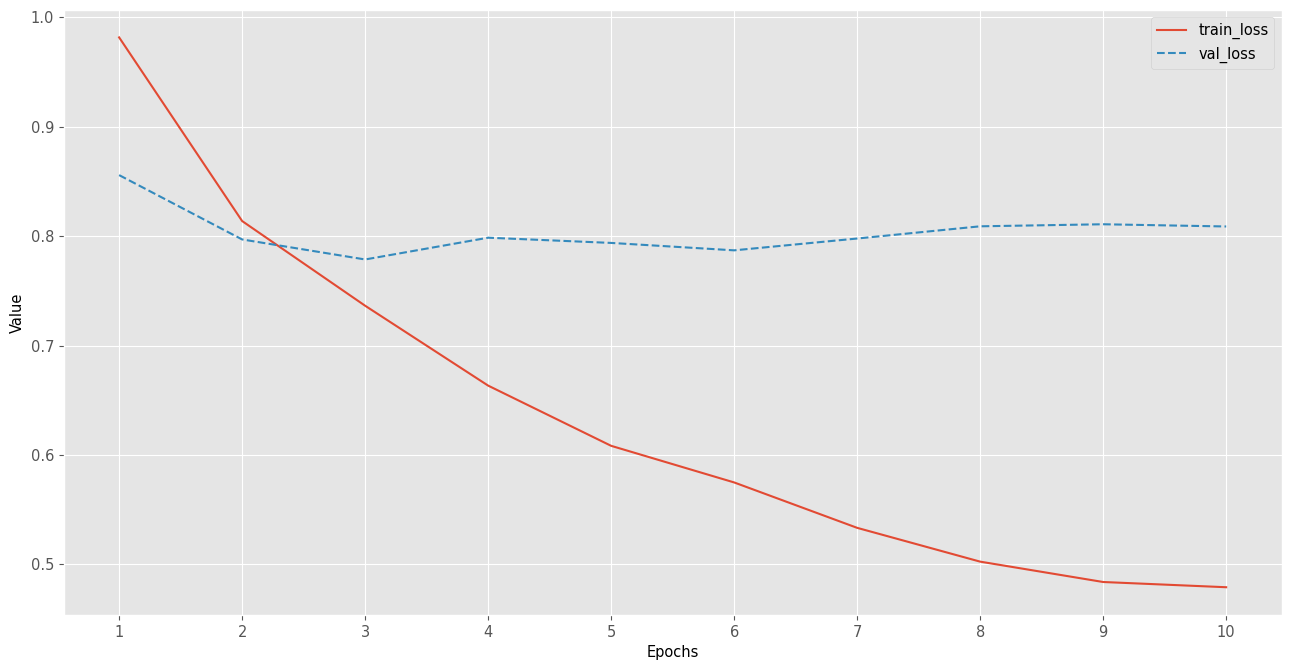

/usr/local/lib/python3.10/dist-packages/ml_things/plot_functions.py:409: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  warnings.warn(f'`magnify` needs to have value in [0,1]! `{magnify}` will be converted to `0.1` as default.',


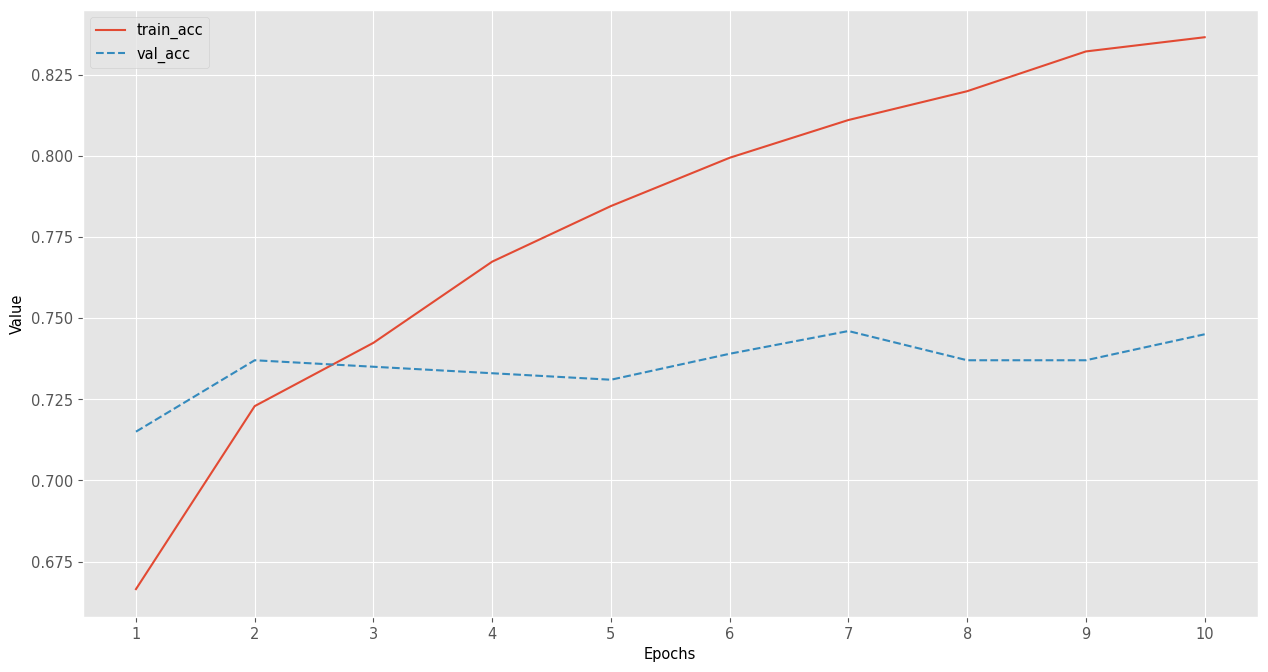

In [51]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, log_loss
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # default is 1e-8.
                  )

# Total number of training steps is number of batches * number of epochs.
# `train_dataloader` contains batched data so `len(train_dataloader)` gives
# us the number of batches.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

# Store the average loss after each epoch so we can plot them.
all_loss = {'train_loss':[], 'val_loss':[]}
all_acc = {'train_acc':[], 'val_acc':[]}

# Loop through each epoch.
print('Epoch')
for epoch in tqdm(range(epochs)):
  print()
  print('Training on batches...')
  # Perform one full pass over the training set.
  train_labels, train_predict, train_loss = train(train_dataloader, optimizer, scheduler, device)
  train_acc = accuracy_score(train_labels, train_predict)
  train_precision = precision_score(train_labels, train_predict, average="macro")
  train_recall = recall_score(train_labels, train_predict, average="macro")
  train_f1 = f1_score(train_labels, train_predict, average="macro")

  # Get prediction form model on validation data.
  print('Validation on batches...')
  valid_labels, valid_predict, val_loss = validation(valid_dataloader, device)
  val_acc = accuracy_score(valid_labels, valid_predict)

  # Print loss and accuracy values to see how training evolves.
  print("  train_loss: %.5f - val_loss: %.5f - train_acc: %.5f - valid_acc: %.5f"%(train_loss, val_loss, train_acc, val_acc))
  print(f"precision: {train_precision}, recall:{train_recall}, f1_score:{train_f1}")

  # Store the loss value for plotting the learning curve.
  all_loss['train_loss'].append(train_loss)
  all_loss['val_loss'].append(val_loss)
  all_acc['train_acc'].append(train_acc)
  all_acc['val_acc'].append(val_acc)

# Plot loss curves.
plot_dict(all_loss, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

# Plot accuracy curves.
plot_dict(all_acc, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])


In [35]:
torch.save(model.state_dict(), "topic_classification_gpt2_model.pth")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.load_state_dict(torch.load("topic_classification_gpt2_model.pth"))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<All keys matched successfully>

In [ ]:
import numpy as np

# Set the model to evaluation mode
model.eval()
model.to('cpu')
# Create a function for sentiment analysis
def predict_topic(text):
  inputs = tokenizer(text, return_tensors="pt")
  with torch.no_grad():
    logits = model(**inputs).logits
  probabilities = torch.nn.functional.softmax(logits, dim=1)
  return probabilities
# Example usage
inputs = dataset_dict['test']['text'][:10]
labels = dataset_dict['test']['label'][:10]

for i, text in enumerate(inputs):
  arr=[]
  probabilities = predict_topic(text)
  print(text)
  for j in range(8):
    # print(f"{labels_ids[j]} Probability: {probabilities[0][j].item() }")
    arr.append(probabilities[0][j].item())
  print(f"predict: {labels_ids[ np.argmax(arr)]}")
  print(f"truth: {labels_ids[labels[i]]}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NBA 2K21 Demo Gets Release Date
predict: TECHNOLOGY
truth: TECHNOLOGY
Disney faces an Avengers: Endgame-sized hole as earnings plummet
predict: TECHNOLOGY
truth: ENTERTAINMENT
How people are reacting to Kamala Harris's VP nod
predict: ENTERTAINMENT
truth: WORLD
Motorola Razr 5G could be coming in early September
predict: TECHNOLOGY
truth: TECHNOLOGY
Absa downbeat over Tito Mboweni’s chances of righting finances
predict: ENTERTAINMENT
truth: WORLD
Aho, Reimer help Hurricanes sweep Rangers
predict: SPORTS
truth: SPORTS
How insane power bill drove couple to biogas
predict: WORLD
truth: NATION
IWT: World Bank expresses inability to appoint neutral expert or Court of Arbitration
predict: NATION
truth: NATION
No. of COVID-19 tests in Delhi goes down in August, officials attribute it to improved situation
predict: NATION
truth: HEALTH
Researchers identify a useful biomarker for intestinal diseases
predict: WORLD
truth: HEALTH


In [52]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, log_loss
model.eval()
model.to('cpu')
# Create a function for sentiment analysis
def predict_topic(text):
  inputs = tokenizer(text, return_tensors="pt")
  with torch.no_grad():
    logits = model(**inputs).logits
  probabilities = torch.nn.functional.softmax(logits, dim=1)
  return probabilities
inputs = dataset_dict['test']['text']
labels = dataset_dict['test']['label']
y_pred_gpt = []
for i, text in enumerate(inputs):
  arr=[]
  probabilities = predict_topic(text)
  for j in range(8):
    arr.append(probabilities[0][j].item())
  y_pred_gpt.append(arr)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
y_pred = np.argmax(y_pred_gpt, axis=1)
y_test = labels
# Print f1, precision, and recall scores
# print(f'Test loss: {log_loss(y_test,  y_pred)}')
print(f'Test accuracy: {accuracy_score(y_test,  y_pred)}')
print(f'Test precision:{precision_score(y_test, y_pred , average="macro")}')
print(f'Test recall:{recall_score(y_test, y_pred , average="macro")}')
print(f'Test f1_score:{f1_score(y_test, y_pred , average="macro")}')

Test accuracy: 0.668
Test precision:0.6930372581824188
Test recall:0.6544621945529397
Test f1_score:0.6552202876412232


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, log_loss
model.eval()
model.to('cpu')
# Create a function for sentiment analysis
def predict_topic(text):
  inputs = tokenizer(text, return_tensors="pt")
  with torch.no_grad():
    logits = model(**inputs).logits
  probabilities = torch.nn.functional.softmax(logits, dim=1)
  return probabilities
inputs = dataset_dict['validation']['text']
labels = dataset_dict['validation']['label']
y_pred_gpt = []
for i, text in enumerate(inputs):
  arr=[]
  probabilities = predict_topic(text)
  for j in range(8):
    arr.append(probabilities[0][j].item())
  y_pred_gpt.append(arr)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
y_pred = np.argmax(y_pred_gpt, axis=1)
y_test = labels
# Print f1, precision, and recall scores
# print(f'Test loss: {log_loss(y_test,  y_pred)}')
print(f'Test accuracy: {accuracy_score(y_test,  y_pred)}')
print(f'Test precision:{precision_score(y_test, y_pred , average="macro")}')
print(f'Test recall:{recall_score(y_test, y_pred , average="macro")}')
print(f'Test f1_score:{f1_score(y_test, y_pred , average="macro")}')

Test accuracy: 0.647
Test precision:0.6835391613663537
Test recall:0.6441446338748971
Test f1_score:0.6456039384378527


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Test Dataset with new article in google news

In [ ]:
# install pygooglenews to scrap news data
!pip install setuptools==58
!pip install pygooglenews --upgrade
!pip install feedparser --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 816.3/816.3 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
arviz 0.15.1 requires setuptools>=60.0.0, but you have setuptools 58.0.0 which is incompatible.
cvxpy 1.3.2 requires setuptools>65.5.1, but you have setuptools 58.0.0 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.0/362.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for feedparser: filename=feedparser-5.2.1-py3-none-any.whl size=45010 sha256=a63f776f5d6f2dc48c3c5161498cd1df3c17bf0f00647de6a35a21fff7d9022d
  Stored in directory: /root/.cache/pip/wheels/35/49/00/0effa75eb79f1003f7e929da5f553ec09b485ed51e1ffceab3
Successfully built feedparser
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6067 sha256=51bc48c0a4342350adddaebc8b69f566c79006dd2b51be00d322bbb139edc2e2
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
  Attempting uninstall: feedparser
    Found existing installation: feedparser 5.2.1
    Un

In [ ]:
from pygooglenews import GoogleNews
# for testing
gn = GoogleNews(lang = 'en', country = 'US')

In [ ]:
# the pygooglenews accep topic are WORLD, NATION, BUSINESS, TECHNOLOGY, ENTERTAINMENT, SCIENCE, SPORTS , HEALTH
world = gn.topic_headlines('WORLD', proxies=None, scraping_bee = None)
nation = gn.topic_headlines('NATION', proxies=None, scraping_bee = None)
business = gn.topic_headlines('BUSINESS', proxies=None, scraping_bee = None)
technology = gn.topic_headlines('TECHNOLOGY', proxies=None, scraping_bee = None)
entertainment = gn.topic_headlines('ENTERTAINMENT', proxies=None, scraping_bee = None)
science = gn.topic_headlines('SCIENCE', proxies=None, scraping_bee = None)
sports = gn.topic_headlines('SPORTS', proxies=None, scraping_bee = None)
health = gn.topic_headlines('HEALTH', proxies=None, scraping_bee = None)

In [ ]:
world_data = {
    'topic': ['WORLD'] * len(world['entries']),
    'title': [entry['title'] for entry in world['entries']],
}
nation_data = {
    'topic': ['NATION'] * len(nation['entries']),
    'title': [entry['title'] for entry in nation['entries']],
}
business_data = {
    'topic': ['BUSINESS'] * len(business['entries']),
    'title': [entry['title'] for entry in business['entries']],
}
technology_data = {
    'topic': ['TECHNOLOGY'] * len(technology['entries']),
    'title': [entry['title'] for entry in technology['entries']],
}
entertainment_data = {
    'topic': ['ENTERTAINMENT'] * len(entertainment['entries']),
    'title': [entry['title'] for entry in entertainment['entries']],
}
science_data = {
    'topic': ['SCIENCE'] * len(science['entries']),
    'title': [entry['title'] for entry in science['entries']],
}
sports_data = {
    'topic': ['SPORTS'] * len(sports['entries']),
    'title': [entry['title'] for entry in sports['entries']],
}
health_data = {
    'topic': ['HEALTH'] * len(health['entries']),
    'title': [entry['title'] for entry in health['entries']],
}

In [ ]:
dataset_new_test = pd.concat([
    pd.DataFrame(world_data),
    pd.DataFrame(nation_data),
    pd.DataFrame(business_data),
    pd.DataFrame(technology_data),
    pd.DataFrame(entertainment_data),
    pd.DataFrame(science_data),
    pd.DataFrame(sports_data),
    pd.DataFrame(health_data)
], ignore_index=True)

In [ ]:
dataset_new_test

,topic,title
0,WORLD,"Blinken says ""more needs to be done"" to protec..."
1,WORLD,Huge crowds expected for London pro-Palestinia...
2,WORLD,Riyadh hosts Islamic-Arab summit to push for G...
3,WORLD,Gaza hospital ‘surrounded by tanks’ as other h...
4,WORLD,Fagradalsfjall: Iceland declares emergency ove...
...,...,...
555,HEALTH,Good Cardiovascular Habits Can Knock 6 Years o...
556,HEALTH,Glucose-dependent insulinotropic polypeptide r...
557,HEALTH,The Long Quest for a Universal Flu Vaccine Fin...
558,HEALTH,Doctor explains why chicken soup is so effecti...


### Model RNN test

In [ ]:
# split dataset antara text dan label
X_rnn_new = dataset_new_test['title'].tolist()
y_rnn_new= dataset_new_test['topic']

In [ ]:
# fit tokenizer dengan teks data untuk menciptakan kamus
tokenizer_rnn.fit_on_texts(X_rnn_new )

# mengkonversi teks menjadi sequence integer token berdasarkan kamus
sequences = tokenizer_rnn.texts_to_sequences(X_rnn_new )

# memberikan pading terhadap sequence ke panjang yang ditentukan
X_rnn_out_new = pad_sequences(sequences, maxlen=100)